# Link Prediction Lab

In [155]:
# %matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import random as rnd

rnd.seed()

# Function to visualize the graph with predicted links

In [156]:
def visualize_links(G, node, score_func, title):
    links = link_list(G, node, score_func)
    top_links = links[:5]  # Visualize top 5 links

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')

    for link, score in top_links:
        nx.draw_networkx_edges(G, pos, edgelist=[link], width=2.5, alpha=0.6, edge_color='r')
        print(f"Link: {link}, Score: {score}")

    plt.title(title)
    plt.show()

## Graph Input

In [157]:
G = nx.read_edgelist("karate") # read data using NetworkX

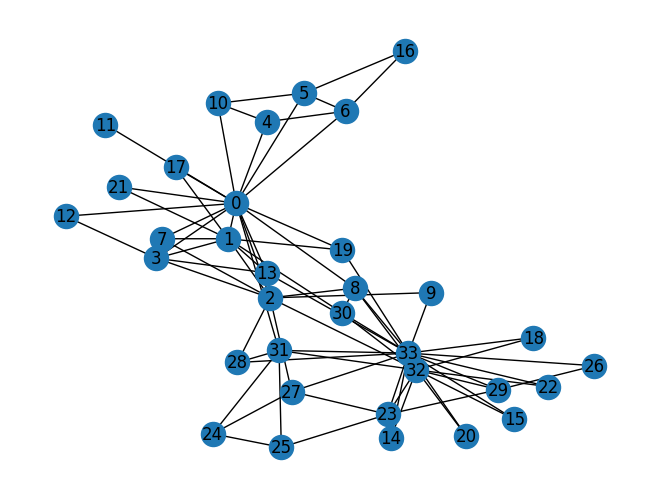

In [158]:
nx.draw(G, with_labels=True)
plt.show()

## Computing Common Neighbors Score

We define the "common neighbours" link score:

**Purpose:** Computes the number of common neighbors between two nodes in a graph.

**Parameters:**

+ **G:** The graph.

+ **i, j:** The nodes for which the common neighbors are calculated.

**Returns:** The number of common neighbors between nodes i and j.

In [159]:
def common_neighbors(G,i,j):
    # G - the graph
    # i: the 1st node or Root Node
    # j: the 2nd node
    return len(set(G.neighbors(i)) and set(G.neighbors(j)))

In [160]:
common_neighbors(G,'31','17')

2

## Link Prediction Functions

## Link List

**Purpose:** We define a function which returns a sorted list of scores from a node to other possible nodes in the graph:

**Parameters:**

+ **G:** The graph.

+ **i:** The node from which potential links are evaluated.

+ **score_func:** The function used to score the potential links.

**Returns:** A sorted list of tuples, each containing a potential link and its score.

In [161]:
def link_list(G,i,score_func):
    # G - the graph
    # i - the node
    # score_func - the link scoring function, having the signature score_func(G,i,j)
    links = []
    for j in G.nodes():
        if not G.has_edge(i,j):
            e = (i,j)
            sc = score_func(G,i,j)
            links.append([e,sc])
    links.sort(key = lambda x: x[1], reverse = True) 
    return links

Link: ('31', '2'), Score: 10
Link: ('31', '1'), Score: 9
Link: ('31', '31'), Score: 6
Link: ('31', '3'), Score: 6
Link: ('31', '13'), Score: 5


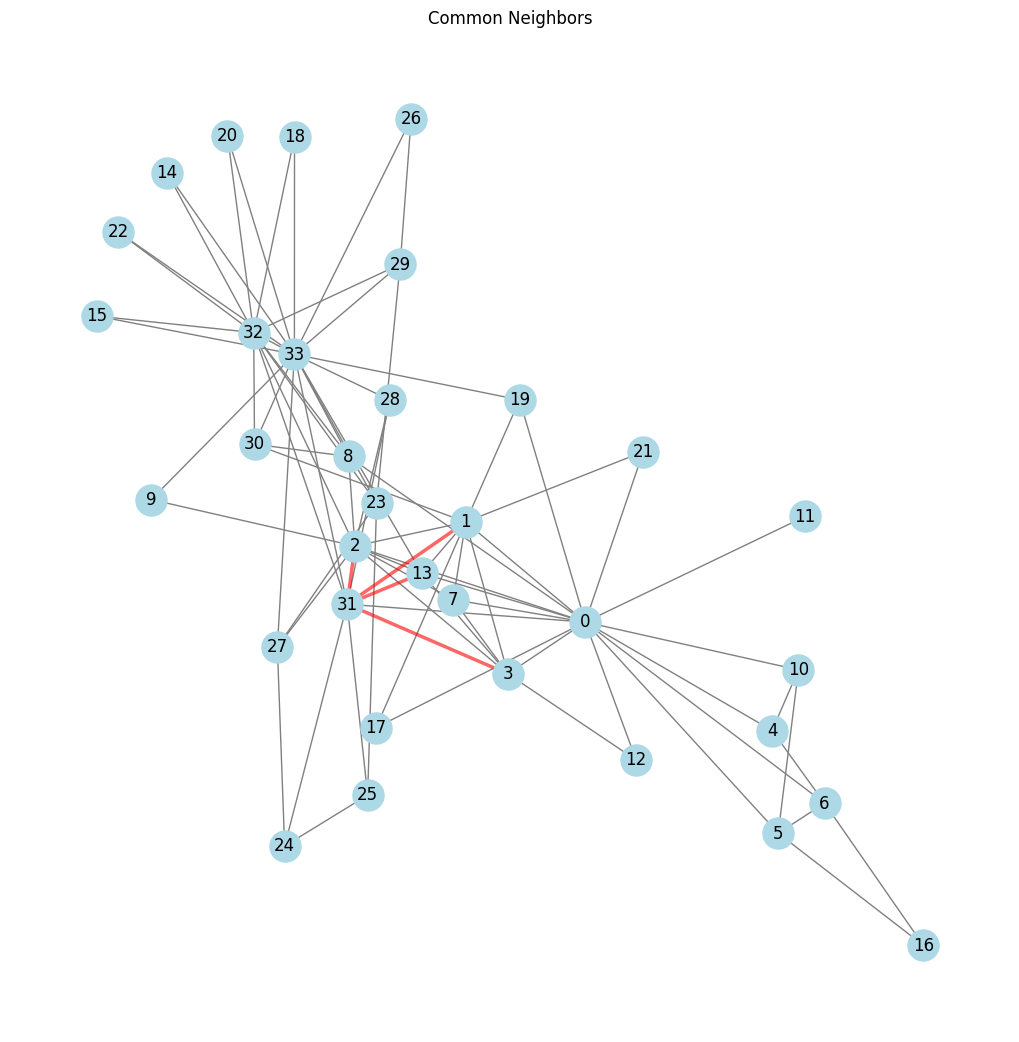

In [162]:
link_list(G,'31',common_neighbors)

# Visualize common neighbors
visualize_links(G, '31', common_neighbors, "Common Neighbors")

In [163]:
def visualize_links(G, node, score_func, title):
    links = link_list(G, node, score_func)  # Generate a list of potential links and their scores using the provided scoring function
    top_links = links[:5]  # Select the top 5 links based on their scores

    pos = nx.spring_layout(G)  # Compute the positions for all nodes using the spring layout algorithm
    plt.figure(figsize=(10, 10))  # Create a new figure with a specified size
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='gray')  # Draw the graph with nodes and edges

    for link, score in top_links:  # Iterate over the top 5 links
        nx.draw_networkx_edges(G, pos, edgelist=[link], width=2.5, alpha=0.6, edge_color='r')  # Highlight the top links in red
        print(f"Link: {link}, Score: {score}")  # Print the link and its score

    plt.title(title)  # Set the title of the plot
    plt.show()  # Display the plot


### 1. Neighbour-based measures: Jaccard coefficient, and preferential attachment measure  
#### 1.1 Jaccard coefficient  
The Jaccard coefficient measures the similarity between two sets by comparing the size of the intersection to the size of the union of the sets. In the context of graph theory, it's used to estimate the likelihood of a link forming between two nodes based on the number of shared neighbors.  
  
Formula:  
Jaccard Coefficient (u, v) = $$\frac{|N(u) \cap N(v)|}{|N(u) \cap N(v)|}$$
Where:  
  
+ $N(u)$ and $N(v)$ are the sets of neighbors of nodes u and v, respectively.  
+ $∣N(u)∩N(v)|$ is the number of common neighbors between u and v.  
+ $∣N(u)∪N(v)|$ is the total number of unique neighbors of u and v.  
  
Interpretation:  

+ High value: Nodes uu and vv share many neighbors, so they are likely to form a link.
+ Low value: Nodes uu and vv share few or no neighbors, making a link less likely.

**Use Case:** The Jaccard Coefficient can be used to suggest friends by identifying users who share many mutual friends. If two users have a high Jaccard similarity in terms of their friend lists, they are more likely to be recommended as potential friends.

In [164]:
# Số điểm giống / tổng số điểm độc nhất của 2 Node 
def jaccard_coefficient(G, i, j):
    neighbors_i = set(G.neighbors(i))  # Get the set of neighbors for node i
    neighbors_j = set(G.neighbors(j))  # Get the set of neighbors for node j
    intersection = len(neighbors_i & neighbors_j)  # Calculate the size of the intersection of the neighbor sets
    union = len(neighbors_i | neighbors_j)  # Calculate the size of the union of the neighbor sets

    return intersection / union if union != 0 else 0  # Return the Jaccard coefficient, handling division by zero

[[('31', '31'), 1.0], [('31', '8'), 0.375], [('31', '23'), 0.375], [('31', '14'), 0.3333333333333333], [('31', '15'), 0.3333333333333333], [('31', '18'), 0.3333333333333333], [('31', '20'), 0.3333333333333333], [('31', '22'), 0.3333333333333333], [('31', '19'), 0.2857142857142857], [('31', '30'), 0.25], [('31', '27'), 0.25], [('31', '29'), 0.25], [('31', '2'), 0.23076923076923078], [('31', '13'), 0.2222222222222222], [('31', '11'), 0.16666666666666666], [('31', '21'), 0.14285714285714285], [('31', '17'), 0.14285714285714285], [('31', '12'), 0.14285714285714285], [('31', '9'), 0.14285714285714285], [('31', '26'), 0.14285714285714285], [('31', '10'), 0.125], [('31', '4'), 0.125], [('31', '7'), 0.1111111111111111], [('31', '6'), 0.1111111111111111], [('31', '5'), 0.1111111111111111], [('31', '3'), 0.09090909090909091], [('31', '1'), 0.07142857142857142], [('31', '16'), 0.0]]







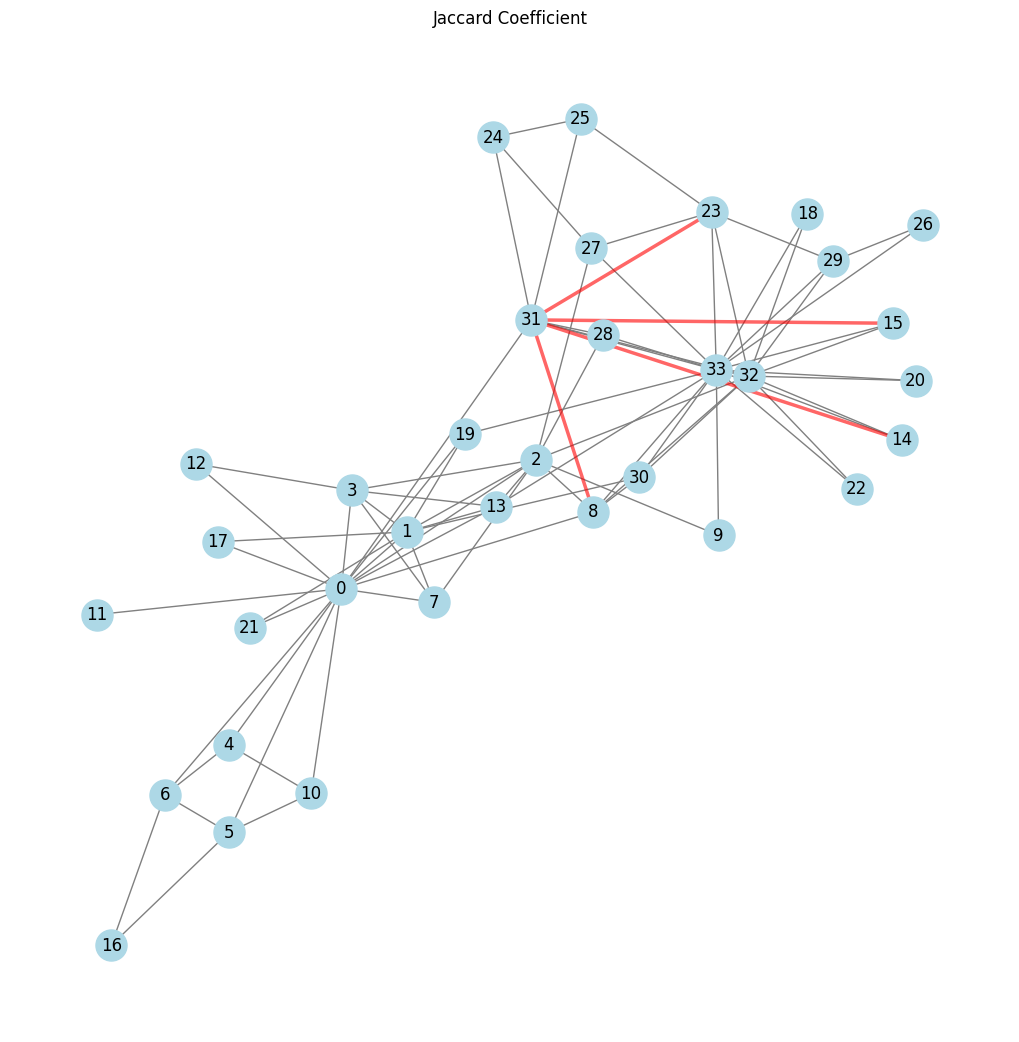

In [165]:
print(link_list(G, '31', jaccard_coefficient))

# Visualize Jaccard coefficient
visualize_links(G, '31', jaccard_coefficient, "Jaccard Coefficient")

#### 1.2 Preferential attachment measure

The preferential attachment measure is based on the principle that nodes with a higher degree (i.e., more connections) are more likely to form links with new or other high-degree nodes. This concept is often used to model networks where "the rich get richer."
Formula:

Preferential Attachment $(u,v)=∣N(u)∣×∣N(v)∣$

Where:
+ $∣N(u)∣$ is the degree (number of neighbors) of node u.
+ $∣N(v)∣$ is the degree (number of neighbors) of node v.

Interpretation:
+ High value: If both nodes u and v have a large number of connections, they are more likely to form a link.
+ Low value: If both nodes u and v have few connections, a link between them is less likely.

**Use Case:** Preferential Attachment can explain how users with many existing connections (like influencers) are more likely to attract new connections. It can be used to predict that new users will tend to follow or connect with already popular users.

In [166]:
def preferential_attachment(G, i, j):
    return len(list(G.neighbors(i))) * len(list(G.neighbors(j)))  # Return the product of the degrees of nodes i and j

[[('31', '2'), 60], [('31', '1'), 54], [('31', '31'), 36], [('31', '3'), 36], [('31', '13'), 30], [('31', '8'), 30], [('31', '23'), 30], [('31', '7'), 24], [('31', '6'), 24], [('31', '5'), 24], [('31', '30'), 24], [('31', '27'), 24], [('31', '29'), 24], [('31', '19'), 18], [('31', '10'), 18], [('31', '4'), 18], [('31', '21'), 12], [('31', '17'), 12], [('31', '12'), 12], [('31', '9'), 12], [('31', '16'), 12], [('31', '14'), 12], [('31', '15'), 12], [('31', '18'), 12], [('31', '20'), 12], [('31', '22'), 12], [('31', '26'), 12], [('31', '11'), 6]]







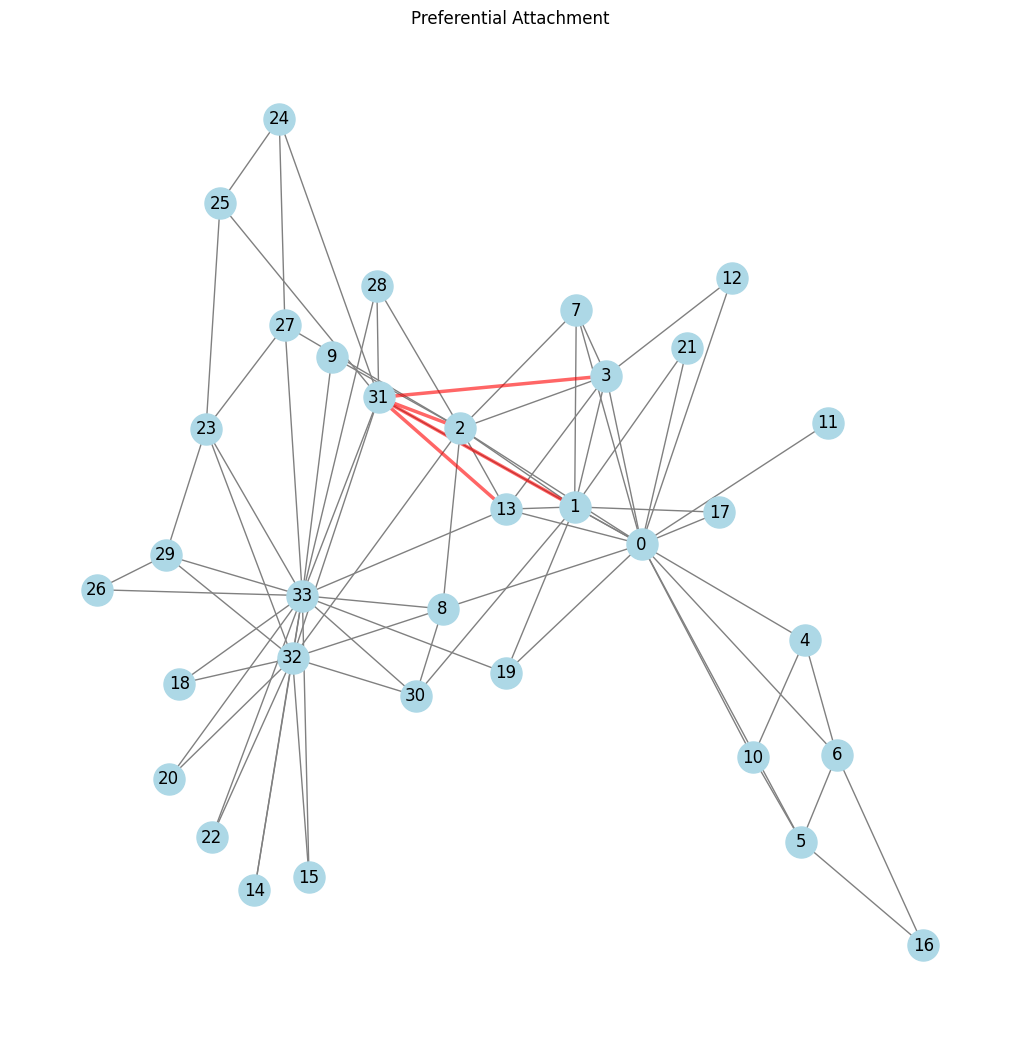

In [167]:
print(link_list(G, '31', preferential_attachment))

# Visualize preferential attachment
visualize_links(G, '31', preferential_attachment, "Preferential Attachment")    

### 2. Inverse Distance Score
The Inverse Distance Score considers the shortest path between two nodes and calculates a score based on the inverse of this distance. This measure assumes that nodes closer to each other in the network are more likely to form a direct connection.

**Formula:**
$$Inverse\:Distance\:Score(u, v) = \frac{1}{d(u, v)}$$

**Where:**
+ d(u,v) is the shortest path distance between nodes u and v.

**Interpretation:**
+ **High value:** If the distance d(u,v) between nodes u and v is small, the score will be high, indicating a higher likelihood of forming a link.
+ **Low value:** If the distance d(u,v) is large, the score will be low, indicating a lower likelihood of a link forming.

**Use Case:**
This measure is particularly useful in networks where connections tend to form between nodes that are already close to each other, such as in social networks or physical networks like roads.

In [168]:
def inverse_distance(G, i, j):
    try:
        distance = nx.shortest_path_length(G, source=i, target=j)  # Compute the shortest path distance between nodes i and j
        return 1 / distance if distance > 0 else 0  # Return the inverse of the distance, handling division by zero
    except nx.NetworkXNoPath:
        return 0  # Return 0 if no path exists between nodes i and j

[[('31', '21'), 0.5], [('31', '19'), 0.5], [('31', '17'), 0.5], [('31', '13'), 0.5], [('31', '12'), 0.5], [('31', '11'), 0.5], [('31', '10'), 0.5], [('31', '8'), 0.5], [('31', '7'), 0.5], [('31', '6'), 0.5], [('31', '5'), 0.5], [('31', '4'), 0.5], [('31', '3'), 0.5], [('31', '2'), 0.5], [('31', '1'), 0.5], [('31', '30'), 0.5], [('31', '27'), 0.5], [('31', '9'), 0.5], [('31', '14'), 0.5], [('31', '15'), 0.5], [('31', '18'), 0.5], [('31', '20'), 0.5], [('31', '22'), 0.5], [('31', '23'), 0.5], [('31', '29'), 0.5], [('31', '26'), 0.5], [('31', '16'), 0.3333333333333333], [('31', '31'), 0]]







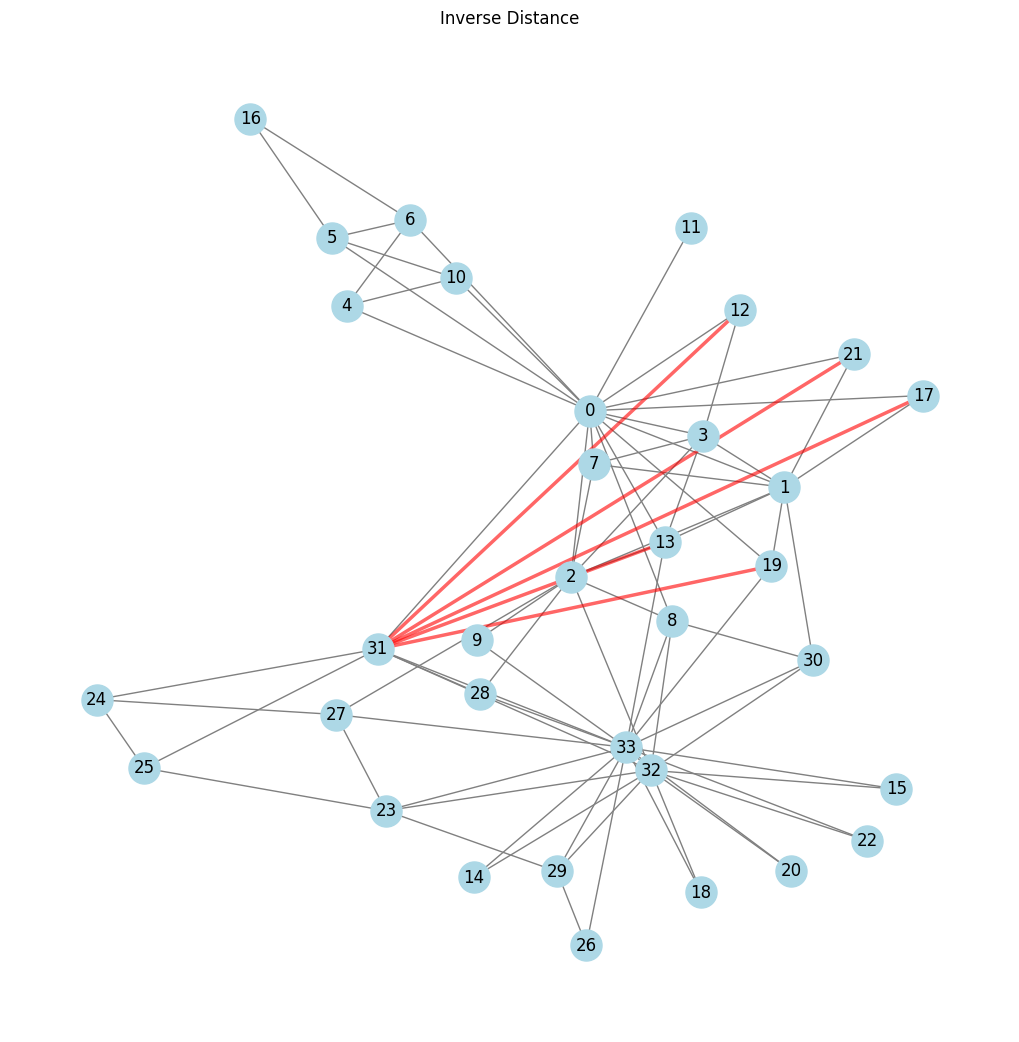

In [169]:
print(link_list(G, '31', inverse_distance))

# Visualize inverse distance
visualize_links(G, '31', inverse_distance, "Inverse Distance")

### 3. Random, in which the link is given a random score in [0, 1]

The Random Score is a baseline method used in link prediction. It assigns a random probability or score to each potential link, without considering the network structure. This score provides a point of comparison to evaluate the effectiveness of more sophisticated link prediction algorithms.

Formula:

Random Score(u,v)=Random value between 0 and 1

Interpretation:
+ Uniform Randomness: Since the score is random, it doesn't reflect any actual likelihood of a link forming between nodes uu and vv. It's purely a random guess.
+ Comparison Tool: It’s often used as a baseline to measure how well other link prediction algorithms perform. If an algorithm performs better than random guessing, it indicates that the algorithm captures meaningful patterns in the network.

Use Case:

The Random Score is typically used in benchmarking, allowing researchers and analysts to determine if their link prediction methods are better than mere chance.

In [170]:
def random_score(G, i, j):
    return rnd.random()

[[('31', '13'), 0.9676911219301013], [('31', '16'), 0.9555162087611361], [('31', '8'), 0.9463888218538515], [('31', '2'), 0.9289911325849848], [('31', '6'), 0.9103303486023075], [('31', '12'), 0.8664981229209394], [('31', '18'), 0.863653812298633], [('31', '19'), 0.8208172032701843], [('31', '26'), 0.7970392475831141], [('31', '15'), 0.7439524615929876], [('31', '11'), 0.7138827670909264], [('31', '20'), 0.6962150652845582], [('31', '1'), 0.6604126635985197], [('31', '7'), 0.5614189644507084], [('31', '5'), 0.5314058382006113], [('31', '10'), 0.5139128053628207], [('31', '22'), 0.4577095195272134], [('31', '3'), 0.4450423841010629], [('31', '29'), 0.28032689102667674], [('31', '14'), 0.2689486515258671], [('31', '4'), 0.17808128863973116], [('31', '21'), 0.13143701000372365], [('31', '9'), 0.12451439538854103], [('31', '30'), 0.11285481648257556], [('31', '17'), 0.08188384573396124], [('31', '23'), 0.07390515106026252], [('31', '31'), 0.06295187930118629], [('31', '27'), 0.042886908379

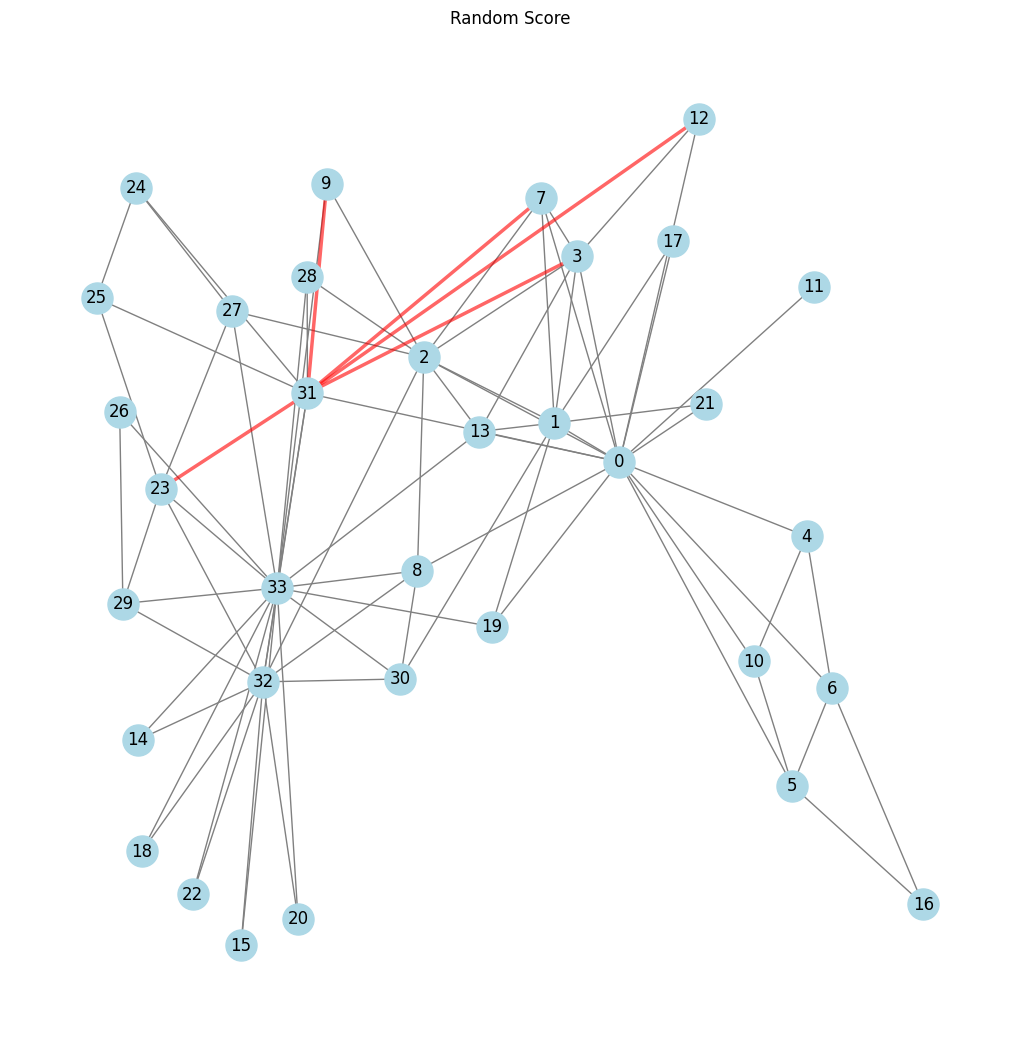

In [171]:
print(link_list(G, '31', random_score))

# Visualize random score
visualize_links(G, '31', random_score, "Random Score")